In [243]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [244]:
#reading the dataset
df=pd.read_csv('auto-mpg.csv')

In [245]:
df.shape

(398, 9)

In [246]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [247]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [248]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [249]:
#horsepower has datatype object but, we can see in the dataset sample that it's supposed to be numeric

In [250]:
#converting horsepower to numeric

In [251]:
df['horsepower']=df['horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [ ]:
#ValueError: could not convert string to float: '?'
#some values seem to have ? in the horsepower column

In [252]:
#looking at the values in the horsepower column

In [253]:
pd.set_option("display.max_rows", None)#for looking at all the rows
df['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: count, dtype: int64

In [254]:
#we can see we have 6 rows with value of horsepower as ?
#we will replace these values with 0

In [255]:
df.index[df['horsepower']=='?']

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [256]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [257]:
#now converting the column to numeric type

In [258]:
df['horsepower']=df['horsepower'].astype(float)

In [259]:
#checking the datatypes
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [260]:
#horsepower has been converted to float data type

In [261]:
#looking for null values

In [262]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [263]:
#horsepower has 6 null values, we can drop them 

In [264]:
df=df.dropna()

In [265]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [266]:
df.shape

(392, 9)

In [267]:
#the rows with null values have been dropped

In [268]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [269]:
#let's look at the car name column
#as such it's of no use to us but we can extract the brand name from it
#the car name has a basic format of "brandname modelvariant"

In [270]:
df['brand'] = df['car name'].str.split(' ').str[0]


In [271]:
df['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [272]:
#we have some names that are of the same brand but are written in different ways
#e.g chevrolet is written as chevy, chevroelt
#so we need to replace them with one name

In [273]:
df['brand']=df['brand'].replace(('chevy','chevroelt'),'chevrolet')
df['brand']=df['brand'].replace(('vokswagen','vw'),'volkswagen')
df['brand']=df['brand'].replace(('toyouta'),'toyota')
df['brand']=df['brand'].replace(('maxda'),'mazda')
df['brand']=df['brand'].replace(('mercedes'),'mercedes-benz')
df['brand']=df['brand'].replace(('datsun'),'nissan')
df['brand']=df['brand'].replace(('capri','mercury'),'ford')
df['brand']=df['brand'].replace(('plymouth'),'chrysler')
df['brand']=df['brand'].replace(('hi'),'international harvester')

In [274]:
df['brand'].unique()

array(['chevrolet', 'buick', 'chrysler', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'nissan', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'international harvester', 'opel', 'fiat',
       'oldsmobile', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'mercedes-benz', 'cadillac', 'triumph'], dtype=object)

In [275]:
df['brand'].value_counts()

brand
ford                       60
chevrolet                  47
chrysler                   37
dodge                      28
amc                        27
toyota                     26
nissan                     24
volkswagen                 22
buick                      17
pontiac                    16
honda                      13
mazda                      12
oldsmobile                 10
fiat                        8
peugeot                     8
audi                        7
volvo                       6
opel                        4
saab                        4
subaru                      4
renault                     3
mercedes-benz               3
cadillac                    2
bmw                         2
international harvester     1
triumph                     1
Name: count, dtype: int64

In [276]:
#we can now drop the car name column

In [277]:
df=df.drop('car name',axis=1)

In [278]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,chrysler
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet
7,14.0,8,440.0,215.0,4312,8.5,70,1,chrysler
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc


In [279]:
#explatory data analysis

In [280]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'brand'],
      dtype='object')

In [281]:
df.corr(numeric_only=True)['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='weight'>

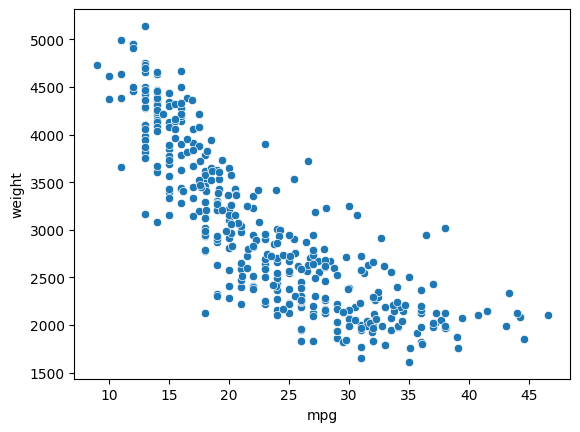

In [282]:
sns.scatterplot(data=df,x='mpg',y='weight')

In [283]:
#we can see that weight has high negative correlation with mpg

<Axes: xlabel='mpg', ylabel='displacement'>

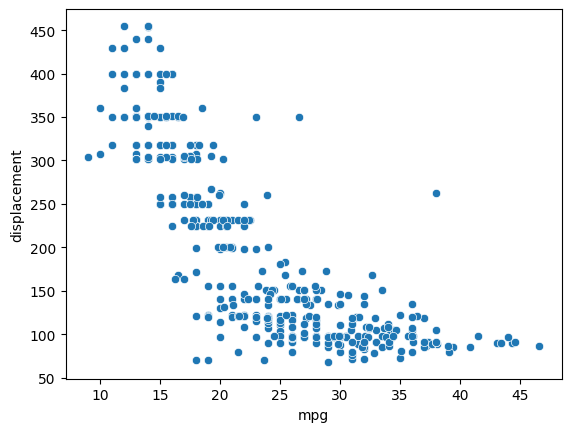

In [284]:
sns.scatterplot(data=df,x='mpg',y='displacement')

In [285]:
#we can see that displacement also has high negative correlation with mpg

<Axes: xlabel='mpg', ylabel='horsepower'>

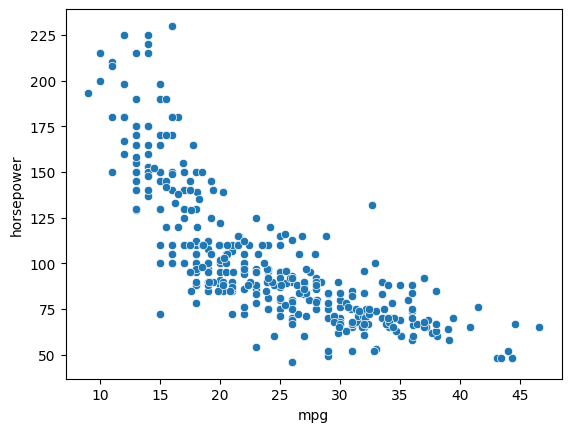

In [286]:
sns.scatterplot(data=df,x='mpg',y='horsepower')

In [287]:
#we can see that horsepower also has high negative correlation with mpg

<Axes: xlabel='mpg', ylabel='cylinders'>

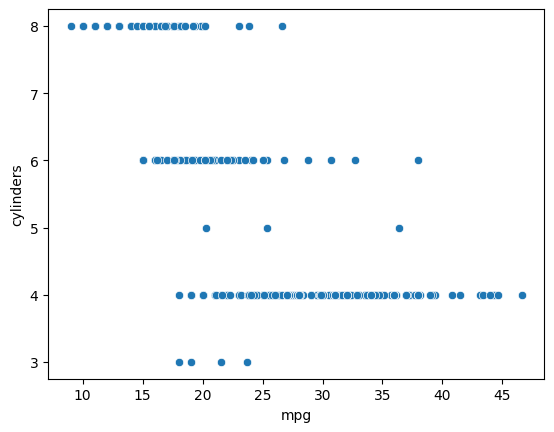

In [288]:
sns.scatterplot(data=df,x='mpg',y='cylinders')

In [289]:
#there is a negative correlation of cylinders with mpg but the correlation is not very high

<Axes: xlabel='mpg', ylabel='acceleration'>

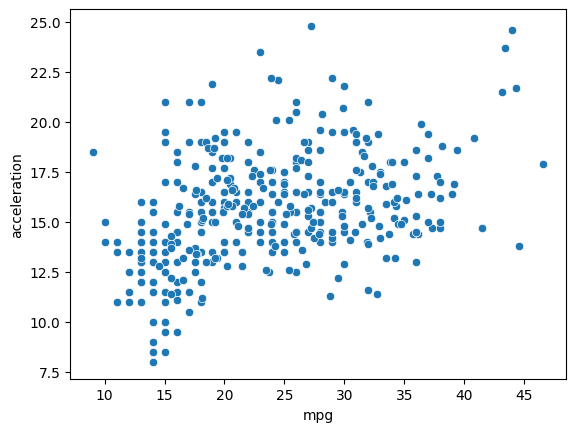

In [290]:
sns.scatterplot(data=df,x='mpg',y='acceleration')

In [291]:
#there seems to be a positive correlation between acceleration and mpg but the correlation is very low

<Axes: xlabel='mpg', ylabel='origin'>

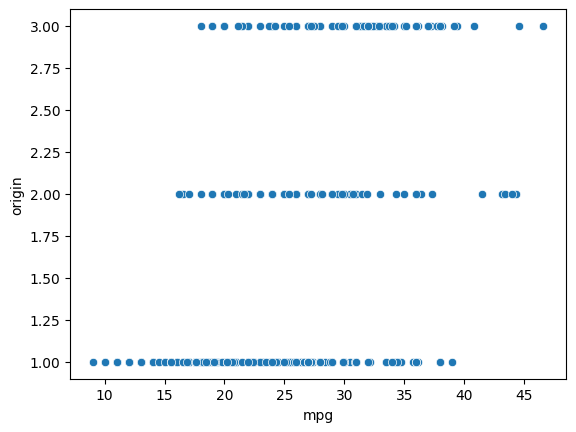

In [292]:
sns.scatterplot(data=df,x='mpg',y='origin')

In [293]:
#there is a positive correlation of origin with mpg but the correlation is not very high

<Axes: xlabel='mpg', ylabel='model year'>

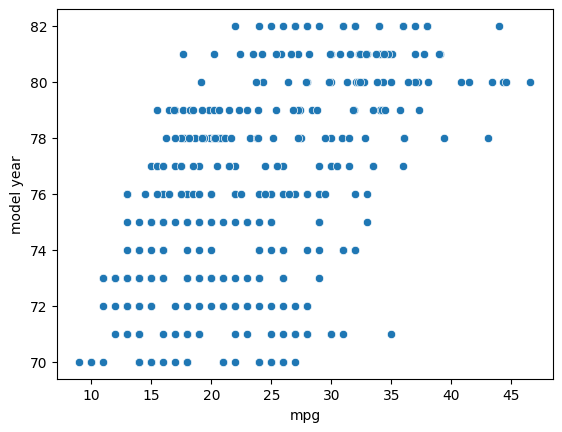

In [294]:
sns.scatterplot(data=df,x='mpg',y='model year')

In [295]:
#there is a positive correlation of model year with mpg but the correlation is not very high

In [296]:
def count_cars(col):
    print(df[col].value_counts())
    print("\n")
    sns.countplot(data=df,x=col)

origin
1    245
3     79
2     68
Name: count, dtype: int64




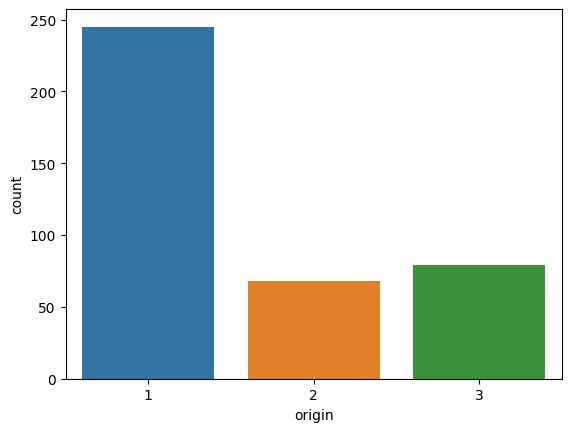

In [297]:
count_cars('origin')

model year
73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: count, dtype: int64




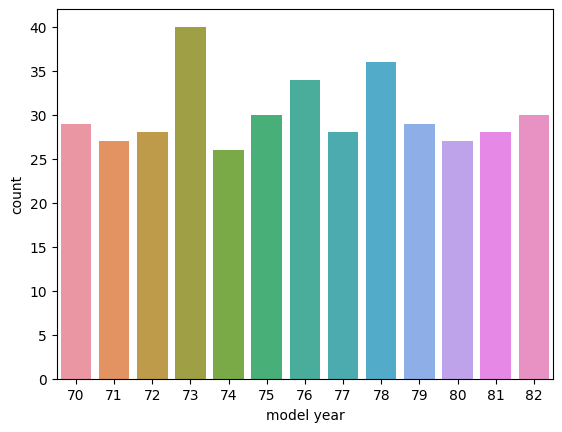

In [298]:
count_cars('model year')

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64




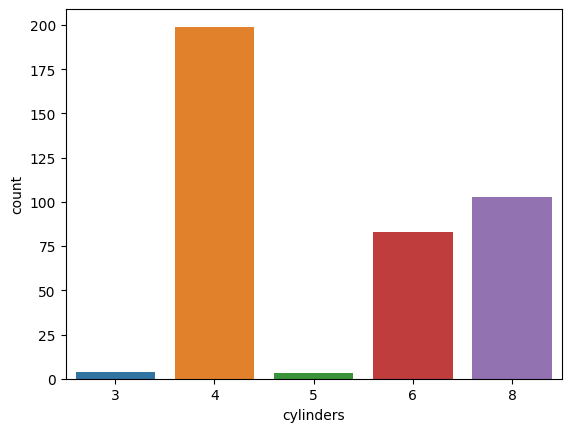

In [299]:
count_cars('cylinders')

brand
ford                       60
chevrolet                  47
chrysler                   37
dodge                      28
amc                        27
toyota                     26
nissan                     24
volkswagen                 22
buick                      17
pontiac                    16
honda                      13
mazda                      12
oldsmobile                 10
fiat                        8
peugeot                     8
audi                        7
volvo                       6
opel                        4
saab                        4
subaru                      4
renault                     3
mercedes-benz               3
cadillac                    2
bmw                         2
international harvester     1
triumph                     1
Name: count, dtype: int64




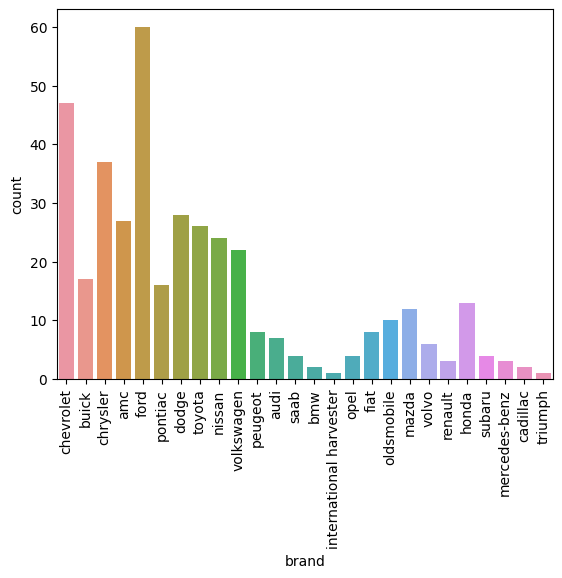

In [300]:
count_cars('brand')
plt.xticks(rotation=90);

In [301]:
#value of mpg based on various columns

In [302]:
def mpg_value(col):
    sns.barplot(data=df,x=col,y='mpg')

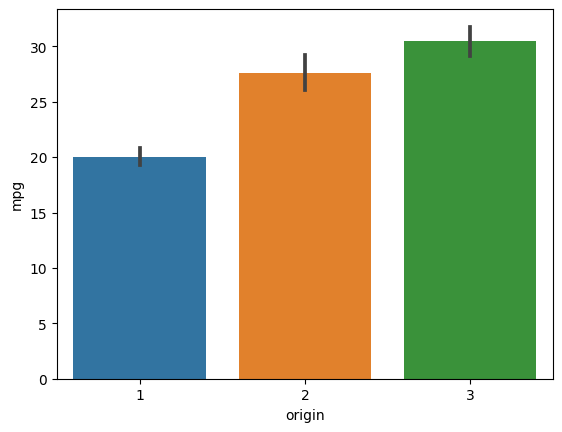

In [303]:
mpg_value('origin')

In [304]:
#cars from origin 3 have the highest mpg

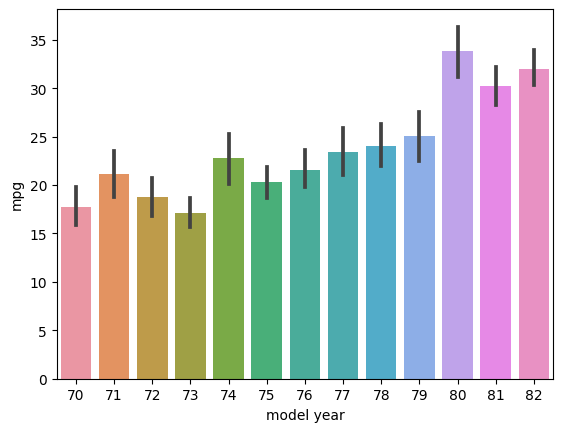

In [305]:
mpg_value('model year')

In [306]:
#cars from model year 80 have the highest mpg

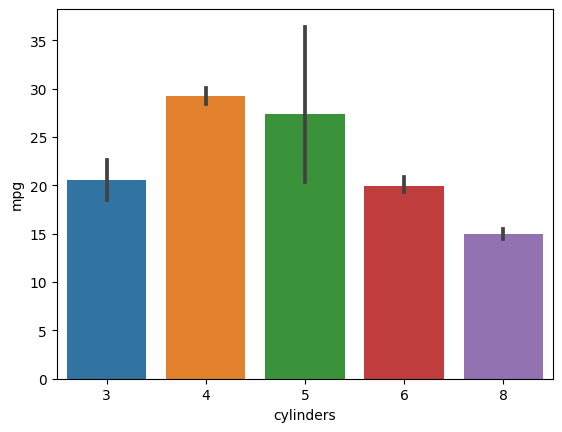

In [307]:
mpg_value('cylinders')

In [308]:
#cars with 4 cylinders have the highest mpg

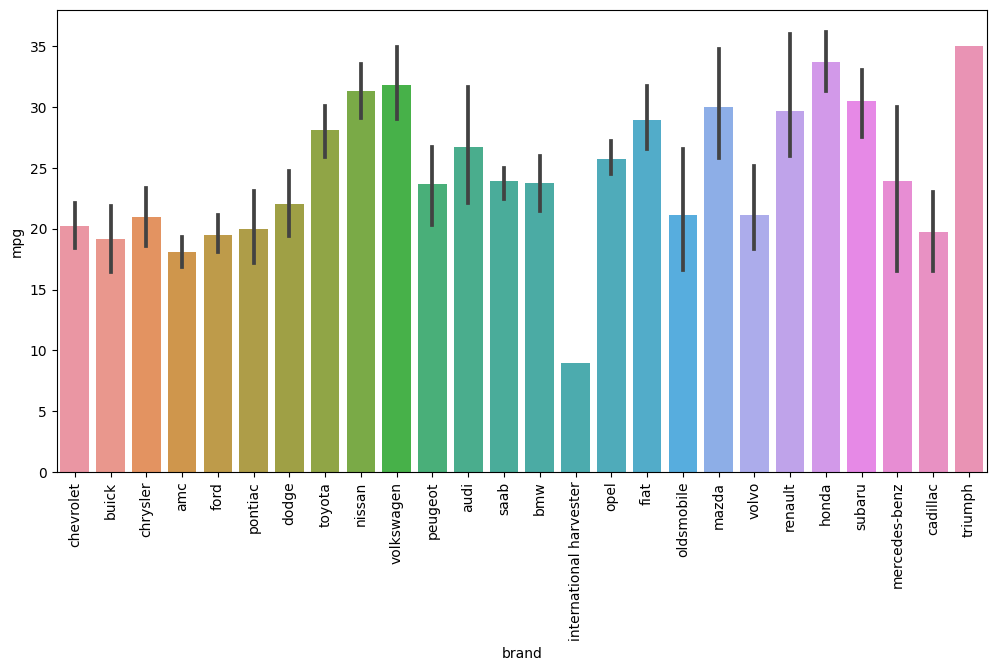

In [309]:
plt.figure(figsize=(12,6))
mpg_value('brand')
plt.xticks(rotation=90);

In [310]:
#triumph brand cars have the highest mpg

<Axes: >

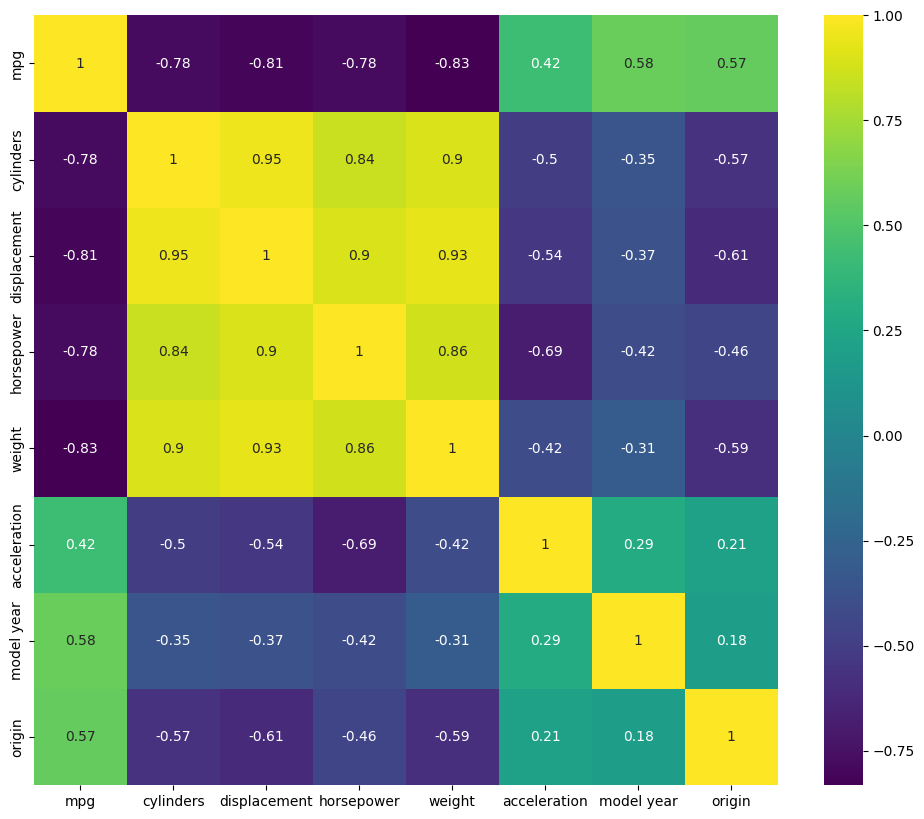

In [311]:
#heatmaps
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

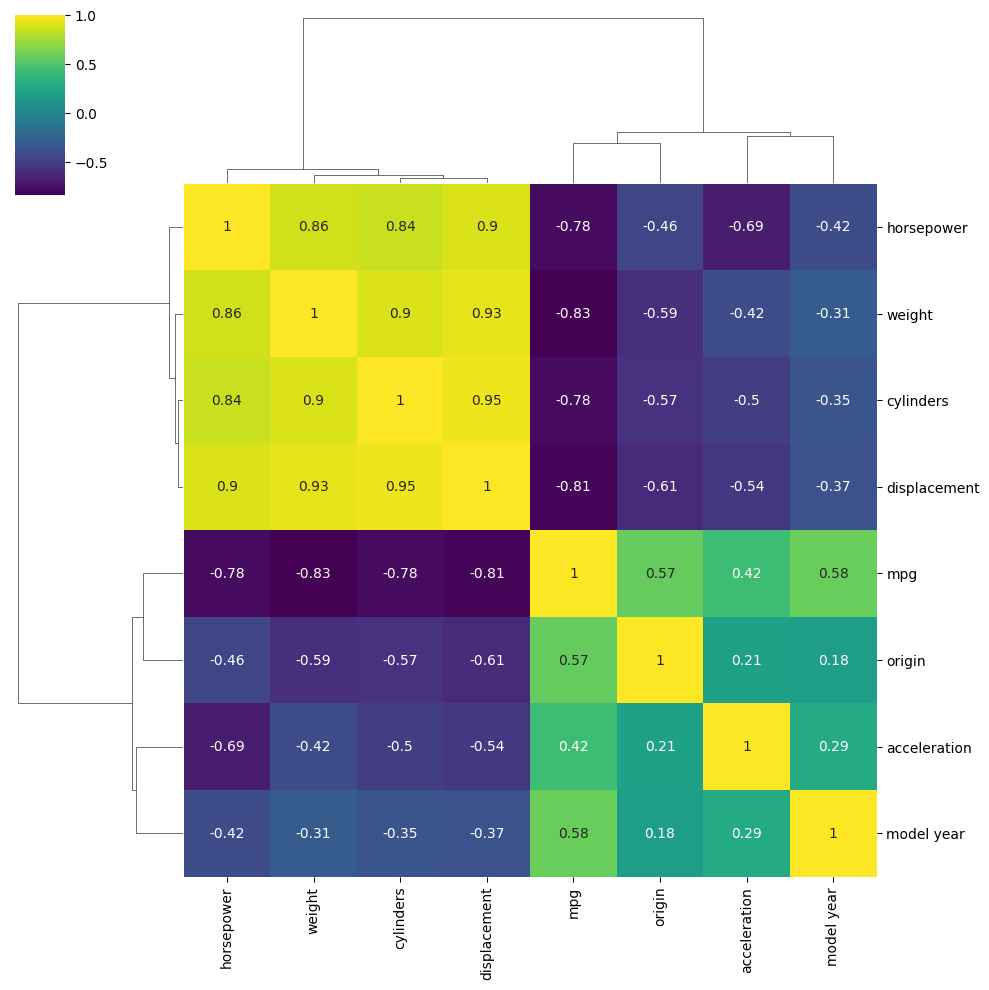

In [312]:
#clustermap
sns.clustermap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [313]:
#encoding

In [370]:
df['brand']=df['brand'].replace(('chevrolet', 'buick', 'chrysler', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'nissan', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'international harvester', 'opel', 'fiat',
       'oldsmobile', 'mazda', 'volvo', 'renault', 'honda', 'subaru',
       'mercedes-benz', 'cadillac', 'triumph'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26))

In [371]:
#splitting and training the data

In [372]:
X=df.drop('mpg',axis=1)
y=df['mpg']

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [375]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [376]:
#scaling the data

In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
scaler=StandardScaler()

In [379]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [380]:
def model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    score=r2_score(y_test,y_pred)
    
    print(f"Mean Absolue Error = {mae}")
    print(f"Mean Squared Error = {mse}")
    print(f"Root Mean Squared Error = {rmse}")
    print(f"R2 Score = {score}")

In [381]:
#Linear Regression

In [382]:
lr=LinearRegression()
model(lr)

Mean Absolue Error = 2.568152139618055
Mean Squared Error = 10.094510513639447
Root Mean Squared Error = 3.1771859425660702
R2 Score = 0.8045225969285612


In [383]:
#Decision Tree

In [384]:
dt=DecisionTreeRegressor()
model(dt)

Mean Absolue Error = 2.6516949152542377
Mean Squared Error = 13.80805084745763
Root Mean Squared Error = 3.71591857384653
R2 Score = 0.7326109158544778


In [385]:
#Random Forest

In [386]:
rf=RandomForestRegressor()
model(rf)

Mean Absolue Error = 1.759101694915254
Mean Squared Error = 6.209048593220343
Root Mean Squared Error = 2.491796258368718
R2 Score = 0.8797634919586123


In [387]:
#Adaboost

In [388]:
ad=AdaBoostRegressor()
model(ad)

Mean Absolue Error = 1.8119795862792683
Mean Squared Error = 6.157887673235624
Root Mean Squared Error = 2.4815091523578197
R2 Score = 0.8807542090185276


In [389]:
#gradient boost

In [390]:
gb=GradientBoostingRegressor()
model(gb)

Mean Absolue Error = 1.6719954207151817
Mean Squared Error = 5.386005526806732
Root Mean Squared Error = 2.32077692310285
R2 Score = 0.895701493213958


In [391]:
#Support Vector

In [392]:
svr=SVR()
model(svr)

Mean Absolue Error = 1.904063539021797
Mean Squared Error = 7.365175977720538
Root Mean Squared Error = 2.713885770941831
R2 Score = 0.8573754050437973


In [394]:
#We can see that Gradient Boosting Regressor performs the best with a r2 score of 89
#we will use it in our final model

In [425]:
final_model=GradientBoostingRegressor(n_estimators=50)
model(final_model)

Mean Absolue Error = 1.6133800655838946
Mean Squared Error = 5.032213222414369
Root Mean Squared Error = 2.2432595084863385
R2 Score = 0.902552583298597


In [426]:
#Dumping the file

In [427]:
import joblib

In [428]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [429]:
joblib.dump(df.columns,'col_names.pkl')

['col_names.pkl']

In [430]:
#loading the model

In [431]:
new_col=joblib.load('col_names.pkl')

In [432]:
loaded_model=joblib.load('final_model.pkl')

In [433]:
loaded_model.predict([[16.0,8,304.0,150,3433,12.0,70,1]])

array([18.86275314])